In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from src.traffic.v2.environment import TrafficModel, Car
from src.traffic.v2.util.network import create_braess_network

number_of_steps = 15

network = create_braess_network()
cars = {
    0: Car( 0, 0, 3, 1, position=((0, 1), 0)),
    1: Car( 1, 0, 3, 1, position=((1, 2), 0))
}

model = TrafficModel(network, cars, anticipate_all_edges=False)

step_stats, car_stats = model.run_sequentially(number_of_steps)

Car 0 at 1 chooses 2.
Latencies: {(0, 1): 1, (0, 2): 11, (1, 2): 1, (1, 3): 11, (2, 3): 1}.
Car 1 at 2 chooses 3.
Latencies: {(0, 1): 1, (0, 2): 11, (1, 2): 1, (1, 3): 11, (2, 3): 1}.
Car 0 at 2 chooses 3.
Latencies: {(0, 1): 1, (0, 2): 11, (1, 2): 1, (1, 3): 11, (2, 3): 1}.
Car 1 at 0 chooses 1.
Latencies: {(0, 1): 1, (0, 2): 11, (1, 2): 1, (1, 3): 11, (2, 3): 2}.
Car 0 at 0 chooses 1.
Latencies: {(0, 1): 1, (0, 2): 11, (1, 2): 1, (1, 3): 11, (2, 3): 1}.
Car 1 at 1 chooses 2.
Latencies: {(0, 1): 2, (0, 2): 11, (1, 2): 1, (1, 3): 11, (2, 3): 1}.
Car 1 at 2 chooses 3.
Latencies: {(0, 1): 1, (0, 2): 11, (1, 2): 1, (1, 3): 11, (2, 3): 1}.
Car 0 at 1 chooses 2.
Latencies: {(0, 1): 1, (0, 2): 11, (1, 2): 1, (1, 3): 11, (2, 3): 2}.
Car 1 at 0 chooses 1.
Latencies: {(0, 1): 1, (0, 2): 11, (1, 2): 1, (1, 3): 11, (2, 3): 1}.
Car 0 at 2 chooses 3.
Latencies: {(0, 1): 2, (0, 2): 11, (1, 2): 1, (1, 3): 11, (2, 3): 1}.
Car 0 at 0 chooses 1.
Latencies: {(0, 1): 1, (0, 2): 11, (1, 2): 1, (1, 3): 11, 

In [8]:
step_stats

route                 flow                             latency  \
               0             1 (0, 1) (0, 2) (1, 2) (1, 3) (2, 3)  (0, 1)   
0             []            []      1      0      1      0      0       1   
1      [1, 2, 3]        [2, 3]      0      0      1      0      1       0   
2         [2, 3]  [0, 1, 2, 3]      1      0      0      0      1       1   
3   [0, 1, 2, 3]     [1, 2, 3]      1      0      1      0      0       1   
4      [1, 2, 3]        [2, 3]      0      0      1      0      1       0   
5         [2, 3]  [0, 1, 2, 3]      1      0      0      0      1       1   
6   [0, 1, 2, 3]     [1, 2, 3]      1      0      1      0      0       1   
7      [1, 2, 3]        [2, 3]      0      0      1      0      1       0   
8         [2, 3]  [0, 1, 2, 3]      1      0      0      0      1       1   
9   [0, 1, 2, 3]     [1, 2, 3]      1      0      1      0      0       1   
10     [1, 2, 3]        [2, 3]      0      0      1      0      1       0   
11        [2, 3]  [0, 1, 2, 3]      1      0      0      0      1       1   
12  [0, 1, 2, 3]     [1, 2, 3]      1      0      1      0      0       1   
13     [1, 2, 3]        [2, 3]      0      0      1      0      1       0   
14        [2, 3]  [0, 1, 2, 3]      1      0      0      0      1       1   

                                
   (0, 2) (1, 2) (1, 3) (2, 3)  
0      11      1     11      0  
1      11      1     11      1  
2      11      1     11      1  
3      11      1     11      0  
4      11      1     11      1  
5      11      1     11      1  
6      11      1     11      0  
7      11      1     11      1  
8      11      1     11      1  
9      11      1     11      0  
10     11      1     11      1  
11     11      1     11      1  
12     11      1     11      0  
13     11      1     11      1  
14     11      1     11      1

In [9]:
car_stats

,step,car_id,source,target,route,travel_time
0,1,1,0,3,"(1, 2, 3)",1
1,2,0,0,3,"(0, 1, 2, 3)",2
2,4,1,0,3,"(0, 1, 2, 3)",3
3,5,0,0,3,"(0, 1, 2, 3)",3
4,7,1,0,3,"(0, 1, 2, 3)",3
5,8,0,0,3,"(0, 1, 2, 3)",3
6,10,1,0,3,"(0, 1, 2, 3)",3
7,11,0,0,3,"(0, 1, 2, 3)",3
8,13,1,0,3,"(0, 1, 2, 3)",3
9,14,0,0,3,"(0, 1, 2, 3)",3


In [10]:
car_stats.groupby('route').count()

,step,car_id,source,target,travel_time
route,,,,,
"(0, 1, 2, 3)",9,9,9,9,9
"(1, 2, 3)",1,1,1,1,1


<Axes: >

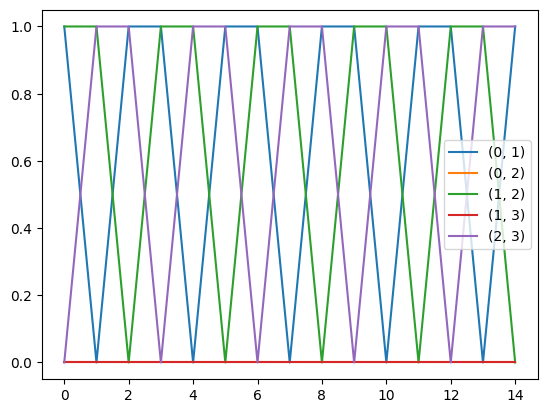

In [11]:
step_stats['flow'].plot()